<a href="https://colab.research.google.com/github/geocarvalho/uni-proj/blob/master/IN1164/project_1/PSO_and_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação: 
- PSO padrão e uma variação.
- ABC (ou Firefly) padrão e uma variação.
- Testar em 6 funções de benchmark com variação de atributos de 10, 20 e 50.

## [Ackley function](http://benchmarkfcns.xyz/benchmarkfcns/ackleyfcn.html) - [em python](https://www.cs.unm.edu/~neal.holts/dga/benchmarkFunction/ackley.html)

$f(\mathbf{x})=f(x_1, ..., x_n)=-a.exp(-b\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2})-exp(\frac{1}{n}\sum_{i=1}^{n}cos(cx_i))+a+exp(1)$

> A função tem um mínimo global, $f(\textbf{x}) = 0$ em $\textbf{x}^* = (0,\dots,0)$

## [Alpine function](http://benchmarkfcns.xyz/benchmarkfcns/alpinen1fcn.html)

$f(\mathbf x)=f(x_1, ..., x_n) = \sum{i=1}^{n}|x_i sin(x_i)+0.1x_i|
$

> A função tem um mínimo global, $f(\textbf{x}) = 0$ em $\textbf{x}^* = (0,\dots,0)$

## [Schwefel Function](http://benchmarkfcns.xyz/benchmarkfcns/schwefelfcn.html) - [em python](https://www.cs.unm.edu/~neal.holts/dga/benchmarkFunction/schwefel.html)

$f(\textbf{x}) = f(x_1, x_2, ..., x_n) = 418.9829d -{\sum_{i=1}^{n} x_i sin(\sqrt{|x_i|})}
$

> A função tem um mínimo global, $f(\textbf{x}) = 0$ em $\textbf{x}^* = (420.9687,\dots,420.9687)$

## [Happy Cat Function](http://benchmarkfcns.xyz/benchmarkfcns/happycatfcn.html) 

$f(\textbf{x})=\left[\left(||\textbf{x}||^2 - n\right)^2\right]^\alpha + \frac{1}{n}\left(\frac{1}{2}||\textbf{x}||^2+\sum_{i=1}^{n}x_i\right)+\frac{1}{2}
$

> A função tem um mínimo global, $f(\textbf{x}) = 0$ em $\textbf{x}^* = (-1,\dots,-1)$

## [Brown function](http://benchmarkfcns.xyz/benchmarkfcns/brownfcn.html)

$f(\textbf{x}) = \sum_{i=1}^{n-1}(x_i^2)^{(x_{i+1}^{2}+1)}+(x_{i+1}^2)^{(x_{i}^{2}+1)}
$

> A função tem um mínimo global, $f(\textbf{x}) = 0$ em $\textbf{x}^* = (0,\dots,0)$

## [Exponential function](http://benchmarkfcns.xyz/benchmarkfcns/exponentialfcn.html)

$f(\mathbf{x})=f(x_1, ..., x_n)=-exp(-0.5\sum_{i=1}^n{x_i^2})
$

> A função tem um mínimo global, $f(\textbf{x}) = 0$ em $\textbf{x}^* = (0,\dots,0)$

Para funções olhar o site: http://benchmarkfcns.xyz/

---

# Funções de fitness


In [175]:
import math
import random
import numpy as np

def simple_func(position):
  """ Simple function that models the problem """
  return position[0]**2 + position[1]**2 + 1

def sphere_func(positions):
  """ Sphere function, global minima is 0
  http://benchmarkfcns.xyz/benchmarkfcns/spherefcn.html"""
  c = np.array(positions)
  x = c**2
  return np.sum(x)

def ackley_func(positions):
  """ Ackley function, global minima is 0"""
  c = np.array(positions)
  firstSum = np.sum(c**2.0)
  secondSum = np.sum(np.cos(2.0*math.pi*c))
  n = float(len(positions))
  return -20.0*math.exp(-0.2*math.sqrt(firstSum/n)) - math.exp(secondSum/n) + 20 + math.e

def alpine_func(positions):
  """ Alpine function, global minima is 0"""
  c = np.array(positions)
  scores = np.sum(abs(c * np.sin(c) + 0.1*c))
  return scores

def schwefel_func(positions):
  """F7 Schwefel's function
  multimodal, asymmetric, separable"""
  c = np.array(positions)
  n = len(c)
  alpha = 418.982887
  fitness = np.sum(c * np.sin(np.sqrt(abs(c))))
  return alpha * n - fitness

def happy_cat_func(positions):
  """ Happy Cat function """
  alpha = 0.5
  c = np.array(positions)
  n = len(c)
  x2 = np.sum(c*c)
  scores = (((x2 - n)**2)**alpha + (0.5*x2 + np.sum(c)))/ (n + 0.5)
  return scores

def brown_func(positions):
  """ Brown function """
  c = np.array(positions)
  n = len(c)
  x = c**2
  scores = 0
  for i in range(n-1):
    scores = scores + x[i]**(x[i+1] + 1) + x[i+1]**(x[i]+1)
  return scores

def exponential_func(positions):
  """ Exponential function """
  c = np.array(positions)
  x2 = c**2
  scores = -np.exp(-0.5 * np.sum(x2))
  return scores


# PSO padrão

* [1995 Particle swarm optimization](https://ieeexplore.ieee.org/abstract/document/488968)
* [1998 A Modified Particle Swarm Optimizer](https://ieeexplore.ieee.org/document/699146)

In [176]:
np.random.seed(0)
def PSO(problem, dimension, var_min, var_max, n_iterations, n_particles, 
        w, c1, c2, show_iter):
  """ PSO algorithm """
  # Initialization
  # np.seterr(over='ignore')
  particle_position_vector = np.random.uniform(var_min,var_max,(
      n_particles, dimension))
  pbest_position = np.copy(particle_position_vector)
  pbest_fitness_value = np.full(shape=n_particles, fill_value=float('inf'))
  gbest_fitness_value = float('inf')
  gbest_position = np.full(shape=dimension, fill_value=0)
  velocity_vector = np.zeros(shape=(n_particles, dimension))
  iteration = 0
  result_list = []
  # Start iterations
  while iteration < n_iterations:
    for p in range(n_particles):
      fitness_candidate = problem(particle_position_vector[p])
      
      # Calculate pbest
      if pbest_fitness_value[p] > fitness_candidate:
        pbest_fitness_value[p] = fitness_candidate
        pbest_position[p] = np.copy(particle_position_vector[p])
    
    # Update velocity of each particle
    for p in range(n_particles):
      new_velocity = (w * velocity_vector[p]) + \
      ((c1 * random.random()) * (pbest_position[p] - particle_position_vector[p])) + \
      ((c2 * random.random()) * (gbest_position - particle_position_vector[p]))
      new_position = new_velocity + particle_position_vector[p]
      # Check if the positions is var_min<x<var_max
      for value in new_position:
        index = list(new_position).index(value)
        new_position[index] = np.max([var_min, value])
        new_position[index] = np.min([var_max, new_position[index]])
      particle_position_vector[p] = new_position
    
    # Calculate gbest
    gbest_candidate = np.min(pbest_fitness_value)
    index_gbest = list(pbest_fitness_value).index(gbest_candidate)
    if gbest_fitness_value > gbest_candidate:
      gbest_fitness_value = gbest_candidate
      gbest_position = np.copy(pbest_position[index_gbest])
    if show_iter:
      print(gbest_fitness_value, " :", gbest_position)
    result_list.append(gbest_fitness_value)
    iteration += 1

  return result_list

In [177]:
np.random.seed(0)
# Problem definition
fitness_values = {"ackley": [ackley_func, -32, 32],
                  "alpine": [alpine_func, 0, 10],
                  "schwefels": [schwefel_func, -500, 500],
                  "happycat": [happy_cat_func, -2, 2],
                  "brown": [brown_func, 0, 10],
                  "exponential": [exponential_func, -1, 4]}
dimensions = [10, 20, 50]

pso_dim_dic = {}
for dim in dimensions:
  pso_func_dic = {}
  for name, func in fitness_values.items():
    kwargs = {"problem": func[0], "dimension": dim, "var_min": func[1], 
              "var_max": func[2], "n_iterations": 100, "n_particles": 50,
              "w": 0.8, "c1": 1.5, "c2": 1.5, "show_iter": False}
    result = PSO(**kwargs)
    pso_func_dic[name] = result
  pso_dim_dic[dim] = pso_func_dic
# print(pso_dim_dic)

# Variação do PSO

* [2011 A novel particle swarm optimization algorithm with adaptive inertia weight](https://www.sciencedirect.com/science/article/abs/pii/S156849461100055X)

## A proposta de calcular o peso inercial

* O modelo de peso inercial proposto é baseado na adaptação do peso de inércia para o problema. Para isso ele determina a porcentagem de sucesso;

* Um alto valor de porcentagem de sucesso indica que as partículas convergiram para um ponto que é longe do ótimo e todo o enxame está se movendo lentamente em direção ao ótimo. Enquanto uma baixa porcentagem indica que as partículas estão ocilando ao redor do ótimo sem evolução.

$P_s(t) = \frac{\sum^n_{i=0}S(i,t)}{n}$

* Onde $n$ é o número de partículas, $P_s \in [0,1]$ é a porcentagem de partículas que tiveram uma melhora no seu *fitness* na última iteração. $\sum^n_{i=1}S(i,t)$ são todas as partículas que tiveram sucesso em minimizar o problema.  

In [178]:
np.random.seed(0)
def AIWPSO(problem, dimension, var_min, var_max, n_iterations, n_particles, 
        w, c1, c2, w_max, w_min, show_iter):
  """ PSO algorithm """
  # Initialization
  # np.seterr(over='ignore')
  particle_position_vector = np.random.uniform(var_min,var_max,(
      n_particles, dimension))
  pbest_position = np.copy(particle_position_vector)
  pbest_fitness_value = np.full(shape=n_particles, fill_value=float('inf'))
  gbest_fitness_value = float('inf')
  gbest_position = np.full(shape=dimension, fill_value=0)
  velocity_vector = np.zeros(shape=(n_particles, dimension))
  iteration = 0
  result_list = []
  # Start iterations
  while iteration < n_iterations:
    sucess_count = 0
    for p in range(n_particles):
      fitness_candidate = problem(particle_position_vector[p])
      
      # Calculate pbest
      if pbest_fitness_value[p] > fitness_candidate:
        sucess_count += 1
        pbest_fitness_value[p] = fitness_candidate
        pbest_position[p] = np.copy(particle_position_vector[p])
    
    # Update velocity of each particle
    for p in range(n_particles):
      new_velocity = (w * velocity_vector[p]) + \
      ((c1 * random.random()) * (pbest_position[p] - particle_position_vector[p])) + \
      ((c2 * random.random()) * (gbest_position - particle_position_vector[p]))
      new_position = new_velocity + particle_position_vector[p]
      # Check if the positions is var_min<x<var_max
      for value in new_position:
        index = list(new_position).index(value)
        new_position[index] = np.max([var_min, value])
        new_position[index] = np.min([var_max, new_position[index]])
      particle_position_vector[p] = new_position
    
    # Calculate gbest
    gbest_candidate = np.min(pbest_fitness_value)
    index_gbest = list(pbest_fitness_value).index(gbest_candidate)
    if gbest_fitness_value > gbest_candidate:
      gbest_fitness_value = gbest_candidate
      gbest_position = np.copy(pbest_position[index_gbest])
    if show_iter:
      print(gbest_fitness_value, " :", gbest_position)
    # Inertia weight adaptation
    ps = sucess_count / n_particles
    w = (w_max - w_min)*ps + w_min
    result_list.append(gbest_fitness_value)
    iteration += 1

  return result_list

In [179]:
np.random.seed(0)
# Problem definition
fitness_values = {"ackley": [ackley_func, -32, 32],
                  "alpine": [alpine_func, 0, 10],
                  "schwefels": [schwefel_func, -500, 500],
                  "happycat": [happy_cat_func, -2, 2],
                  "brown": [brown_func, 0, 10],
                  "exponential": [exponential_func, -1, 4]}
dimensions = [10, 20, 50]

aiwpso_dim_dic = {}
for dim in dimensions:
  aiwpso_func_dic = {}
  for name, func in fitness_values.items():
    kwargs = {"problem": func[0], "dimension": dim, "var_min": func[1], 
              "var_max": func[2], "n_iterations": 100, "n_particles": 50,
              "w": 0.8, "c1": 1.5, "c2": 1.5, "w_max": 1, "w_min":0,
              "show_iter": False}
    result = AIWPSO(**kwargs)
    aiwpso_func_dic[name] = result
  aiwpso_dim_dic[dim] = aiwpso_func_dic
# print(aiwpso_dim_dic)


# ABC padrão

* [2005 An idea based on honey bee swarm for numerical optimization](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.714.4934)
* [2015 PS–ABC: A hybrid algorithm based on particle swarm and artificial bee colony for high-dimensional optimization problems](https://www.sciencedirect.com/science/article/abs/pii/S0957417415005035)

In [180]:
np.random.seed(0)
def fitness_calc(value):
  """ Calculate the fitness based on the object function result """
  if value >= 0:
    return 1/(1+value)
  else:
    return 1 + abs(value)

def generate_new_solution(dimension, food_source, num, food, fit, 
                          var_min, var_max, trial, fitness_func,
                          population, obj):
  """ Generates a new solution """
  # Phi is a random number between -1 and 1
  phi = random.uniform(-1,1)
  ## Select a random variable to change
  var_index_lst = list(range(dimension))
  var_index = random.choice(var_index_lst)
  food_var = food[var_index]
  ## Select a random partner
  partner_index_lst = list(range(food_source))
  partner_index_lst.remove(num)
  partner_index = random.choice(partner_index_lst)
  partner = population[partner_index]
  partner_var = partner[var_index]
  ## Create a new food location
  x_new = food_var + (phi*(food_var - partner_var))
  ## Check if the new location violates the lower bound (0<=x<=10)
  x_new = np.max([var_min, x_new])
  x_new = np.min([var_max, x_new])
  copy_food = np.copy(food)
  copy_food[var_index] = x_new
  ## Evaluate the fitness
  new_obj = fitness_func(copy_food)
  new_fit = fitness_calc(new_obj)
  ## Perform greedy selection
  if new_fit > fit[num]:
    food[var_index] = x_new
    fit[num] = new_fit
    obj[num] = new_obj
    trial[num] = 0
  else:
    trial[num] += 1
  return food, obj, fit, trial

def ABC(dimension, fitness_func, var_min, var_max, pop_size, limit,
        n_cycles, show_iter):
  # Parameters
  employed_bees = int(pop_size/2)
  onlooker_bees = int(pop_size/2)
  food_source = int(pop_size/2)

  # Initialization
  ## The food source population with 4 variables, create random value 0<x<10
  population = np.random.uniform(var_min,var_max,(food_source, dimension))
  ## Calculate the object function for each food source
  obj = np.apply_along_axis(fitness_func, 1, population)
  ## Calculate randintfitness of the population
  fit = np.array([fitness_calc(value) for value in obj])
  ## Generate initial trial vector
  trial = np.zeros(food_source)
  ## Start the best solution variable
  b_fit_solution = np.max(fit)
  b_index = list(fit).index(b_fit_solution)
  b_food = population[b_index]
  b_obj = obj[b_index]
  b_cycle = 0
  result_list = []
  for cycle in range(n_cycles):
    # Employed bee phase
    for num1, food in enumerate(population, start=0):
      food, obj, fit, trial = generate_new_solution(
          dimension, food_source, num1, food, fit, var_min, var_max,
          trial, fitness_func, population, obj)
    # Calculate the probability values
    max = np.max(fit)
    prob = fit/np.sum(fit) #((fit/max)*0.9)+0.1
    # Onlooker bee phase
    num2 = 0
    for obee in range(onlooker_bees):
      search_for_food = True
      while search_for_food:
        # Control the flow to search for food using num and food
        if num2 == len(population-1):
          num2 = 0
        food = population[num2]
        ## Select a random number
        r = random.uniform(0,1)
        if r <= prob[num2]:
          food, obj, fit, trial = generate_new_solution(
              dimension, food_source, num2, food, fit, var_min, var_max,
              trial, fitness_func, population, obj)
          num2 += 1
          search_for_food = False
        else:
          num2 += 1
    # Memorize the best solution
    candidate = np.max(fit)
    if candidate > b_fit_solution:
      b_index = list(fit).index(candidate)
      b_food = np.copy(population[b_index])
      b_fit_solution = fit[b_index]
      b_obj = obj[b_index]
      b_cycle = cycle
      if show_iter:
        print("____Inter values")
        print(population)
        print(obj)
        print(fit)
        print(trial)
    # Scout bee phase
    ## Select one solution for which the trial is greater than limit
    trial_val = np.max(trial)
    num3 = list(trial).index(trial_val)
    if trial_val > limit:
      # Generate a new random solution
      # same as = var_min + (var_max - var_min)*random.uniform(0,1) for each index
      population[num3] = np.random.uniform(var_min,var_max,(dimension))
      obj[num3] = fitness_func(population[num3])
      fit[num3] = fitness_calc(obj[num3])
      trial[num3] = 0
    result_list.append(b_obj)
  if show_iter:
    print("\n____Final values")
    print(population)
    print(obj)
    print(fit)
    print(trial)
  return result_list


In [181]:
np.random.seed(0)
# Problem definition
fitness_values = {"ackley": [ackley_func, -32, 32],
                  "alpine": [alpine_func, 0, 10],
                  "schwefels": [schwefel_func, -500, 500],
                  "happycat": [happy_cat_func, -2, 2],
                  "brown": [brown_func, 0, 10],
                  "exponential": [exponential_func, -1, 4]}
dimensions = [10, 20, 50]

abc_dim_dic = {}
for dim in dimensions:
  abc_func_dic = {}
  for name, func in fitness_values.items():
    kwargs = {"dimension": dim, "fitness_func": func[0], "var_min": func[1], 
              "var_max": func[2], "pop_size": 50, "limit": 5,
              "n_cycles": 100, "show_iter": False}
    result = ABC(**kwargs)
    abc_func_dic[name] = result
  abc_dim_dic[dim] = abc_func_dic
# print(abc_dim_dic)

# Variação do ABC

* [2010 Gbest-guided artificial bee colony algorithm for numerical function optimization](https://www.sciencedirect.com/science/article/abs/pii/S0096300310009136)

## Substituição da equação de atualização de posição

* No algortimo padrão para atualizar a posição da comida pelas abelhas se usa a fórmula:

$v_{ij} = x_{ij} + \phi_{ij}(x_{ij} - x_{kj})$

* No artigo eles adicionam um termo *gbest* no final:

$v_{ij} = x_{ij} + \phi_{ij}(x_{ij} - x_{kj}) + \psi(y_j - x_{kj})$

* Onde $y_j$ é o *j* elemento do melhor solução global e $\psi_{ij}$ é um número aleatório entre $[0,C]$, sendo $C$ uma constante não negativa.
> O melhor valor de $C$ de acordo com os experimentos dos autores foi de $C=1.5$

In [182]:
np.random.seed(0)
def fitness_calc(value):
  """ Calculate the fitness based on the object function result """
  if value >= 0:
    return 1/(1+value)
  else:
    return 1 + abs(value)

def gabc_generate_new_solution(dimension, food_source, num, food, fit, 
                          var_min, var_max, trial, fitness_func,
                          population, obj, b_food):
  """ Generates a new solution """
  # Phi is a random number between -1 and 1
  phi = random.uniform(-1,1)
  ## Select a random variable to change
  var_index_lst = list(range(dimension))
  var_index = random.choice(var_index_lst)
  food_var = food[var_index]
  ## Select a random partner
  partner_index_lst = list(range(food_source))
  partner_index_lst.remove(num)
  partner_index = random.choice(partner_index_lst)
  partner = population[partner_index]
  partner_var = partner[var_index]
  ## Create a new food location
  ### For the new equation C=1.5
  c = 1.5
  psi = random.uniform(0,c)
  gbest = b_food[var_index]
  x_new = food_var + (phi*(food_var - partner_var)) + (psi*(gbest - food_var)) 
  ## Check if the new location violates the lower bound (0<=x<=10)
  x_new = np.max([var_min, x_new])
  x_new = np.min([var_max, x_new])
  copy_food = np.copy(food)
  copy_food[var_index] = x_new
  ## Evaluate the fitness
  new_obj = fitness_func(copy_food)
  new_fit = fitness_calc(new_obj)
  ## Perform greedy selection
  if new_fit > fit[num]:
    food[var_index] = x_new
    fit[num] = new_fit
    obj[num] = new_obj
    trial[num] = 0
  else:
    trial[num] += 1
  return food, obj, fit, trial

def GABC(dimension, fitness_func, var_min, var_max, pop_size, limit,
        n_cycles, show_iter):
  # Parameters
  employed_bees = int(pop_size/2)
  onlooker_bees = int(pop_size/2)
  food_source = int(pop_size/2)

  # Initialization
  ## The food source population with 4 variables, create random value 0<x<10
  population = np.random.uniform(var_min,var_max,(food_source, dimension))
  ## Calculate the object function for each food source
  obj = np.apply_along_axis(fitness_func, 1, population)
  ## Calculate randintfitness of the population
  fit = np.array([fitness_calc(value) for value in obj])
  ## Generate initial trial vector
  trial = np.zeros(food_source)
  ## Start the best solution variable
  b_fit_solution = np.max(fit)
  b_index = list(fit).index(b_fit_solution)
  b_food = population[b_index]
  b_obj = obj[b_index]
  b_cycle = 0
  result_list = []
  for cycle in range(n_cycles):
    # Employed bee phase
    for num1, food in enumerate(population, start=0):
      food, obj, fit, trial = gabc_generate_new_solution(
          dimension, food_source, num1, food, fit, var_min, var_max,
          trial, fitness_func, population, obj, b_food)
    # Calculate the probability values
    max = np.max(fit)
    prob = fit/np.sum(fit) #((fit/max)*0.9)+0.1
    # Onlooker bee phase
    num2 = 0
    for obee in range(onlooker_bees):
      search_for_food = True
      while search_for_food:
        # Control the flow to search for food using num and food
        if num2 == len(population-1):
          num2 = 0
        food = population[num2]
        ## Select a random number
        r = random.uniform(0,1)
        if r <= prob[num2]:
          food, obj, fit, trial = gabc_generate_new_solution(
              dimension, food_source, num2, food, fit, var_min, var_max,
              trial, fitness_func, population, obj, b_food)
          num2 += 1
          search_for_food = False
        else:
          num2 += 1
    # Memorize the best solution
    candidate = np.max(fit)
    if candidate > b_fit_solution:
      b_index = list(fit).index(candidate)
      b_food = np.copy(population[b_index])
      b_fit_solution = fit[b_index]
      b_obj = obj[b_index]
      b_cycle = cycle
      if show_iter:
        print("____Inter values")
        print(population)
        print(obj)
        print(fit)
        print(trial)
    # Scout bee phase
    ## Select one solution for which the trial is greater than limit
    trial_val = np.max(trial)
    num3 = list(trial).index(trial_val)
    if trial_val > limit:
      # Generate a new random solution
      # same as = var_min + (var_max - var_min)*random.uniform(0,1) for each index
      population[num3] = np.random.uniform(var_min,var_max,(dimension))
      obj[num3] = fitness_func(population[num3])
      fit[num3] = fitness_calc(obj[num3])
      trial[num3] = 0
    result_list.append(b_obj)
  if show_iter:
    print("\n____Final values")
    print(population)
    print(obj)
    print(fit)
    print(trial)
  return result_list


In [183]:
np.random.seed(0)
# GABC Problem
fitness_values = {"ackley": [ackley_func, -32, 32],
                  "alpine": [alpine_func, 0, 10],
                  "schwefels": [schwefel_func, -500, 500],
                  "happycat": [happy_cat_func, -2, 2],
                  "brown": [brown_func, 0, 10],
                  "exponential": [exponential_func, -1, 4]}
dimensions = [10, 20, 50]

gabc_dim_dic = {}
for dim in dimensions:
  gabc_func_dic = {}
  for name, func in fitness_values.items():
    kwargs = {"dimension": dim, "fitness_func": func[0], "var_min": func[1], 
              "var_max": func[2], "pop_size": 50, "limit": 5,
              "n_cycles": 100, "show_iter": False}
    result = GABC(**kwargs)
    gabc_func_dic[name] = result
  gabc_dim_dic[dim] = gabc_func_dic
# print(gabc_dim_dic)

# Gráficos
## Função Ackley com os resultados para 10, 20, 50 dimensões

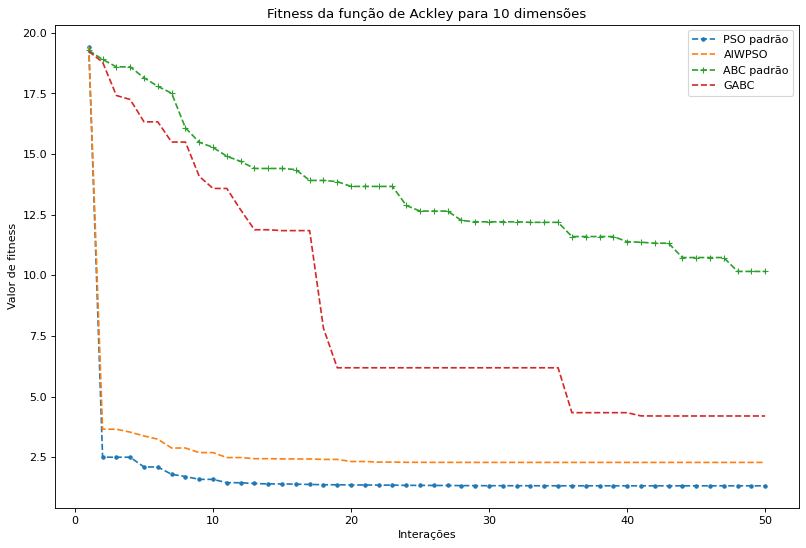

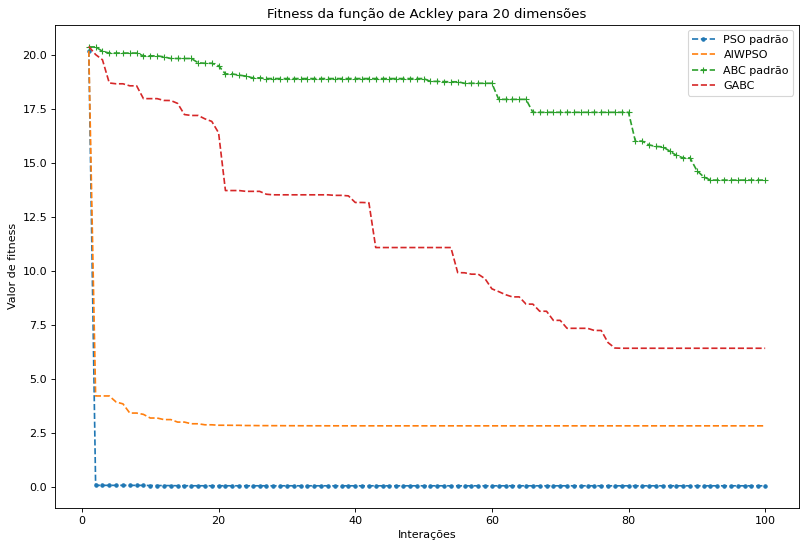

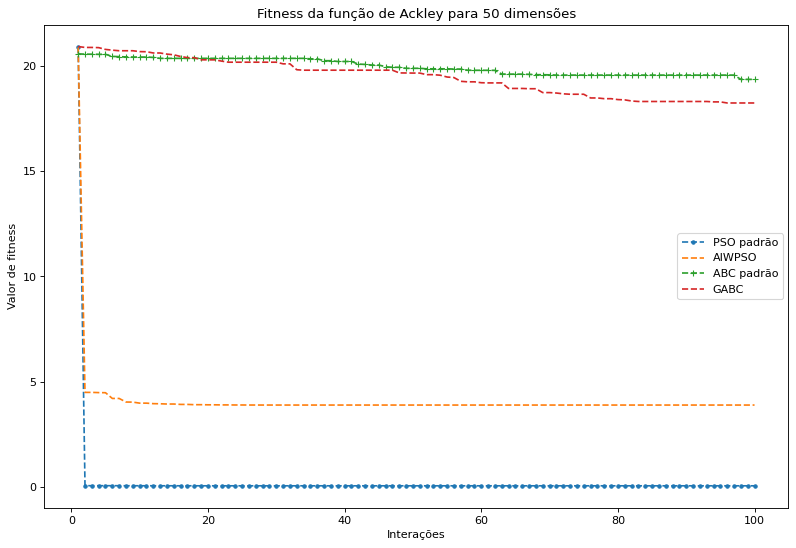

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline

def run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, dim, func,
             size):
  """ Make the fitness plot for each iteration """
  iterations = list(range(1,101))[:size]
  pso_ackley_10 = pso_dim_dic[dim][func][:size]
  aiwpso_ackley_10 = aiwpso_dim_dic[dim][func][:size]
  abc_ackley_10 = abc_dim_dic[dim][func][:size]
  gabc_ackley_10 = gabc_dim_dic[dim][func][:size]

  plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(iterations, pso_ackley_10, ".--", label="PSO padrão")
  plt.plot(iterations, aiwpso_ackley_10, "--", label="AIWPSO")
  plt.plot(iterations, abc_ackley_10, "+--", label="ABC padrão")
  plt.plot(iterations, gabc_ackley_10, "--", label="GABC")
  plt.xlabel("Interações")
  plt.ylabel("Valor de fitness")
  plt.title("Fitness da função de %s para %s dimensões" % (func.title(), dim))
  plt.legend()
  plt.show()
  
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 10, "ackley", 50)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 20, "ackley", 100)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 50, "ackley", 100)


## Função Alpine com os resultados para 10, 20, 50 dimensões

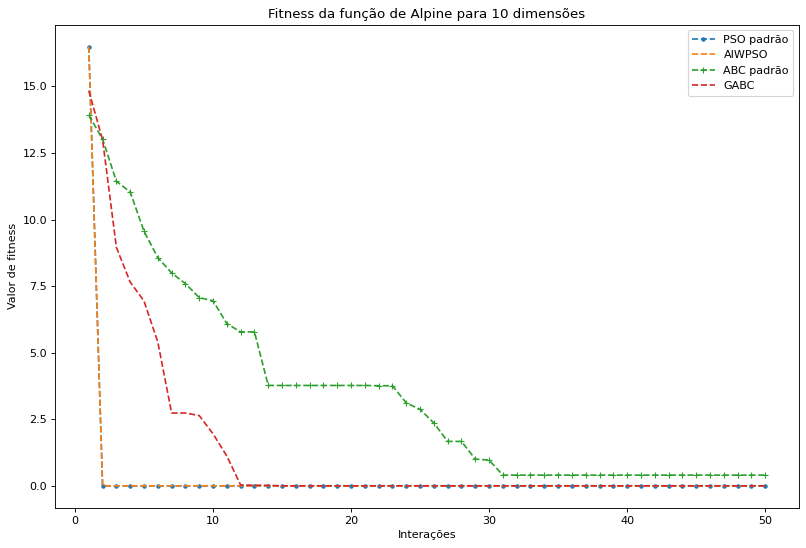

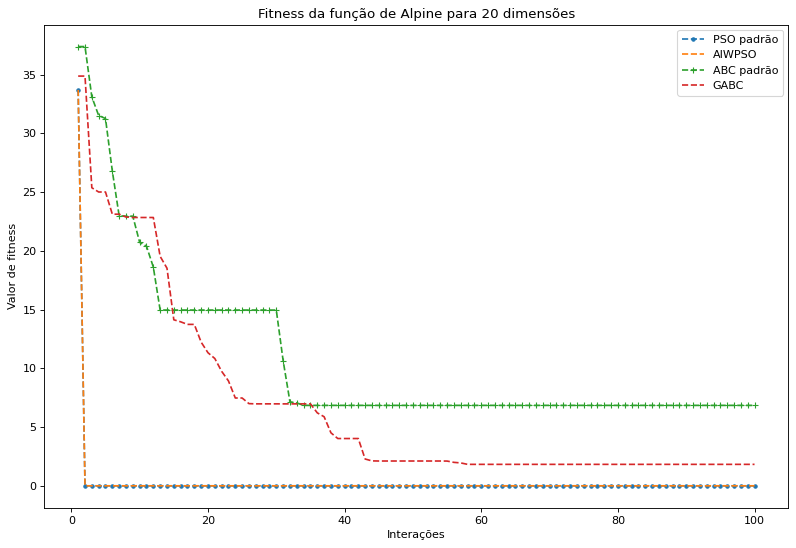

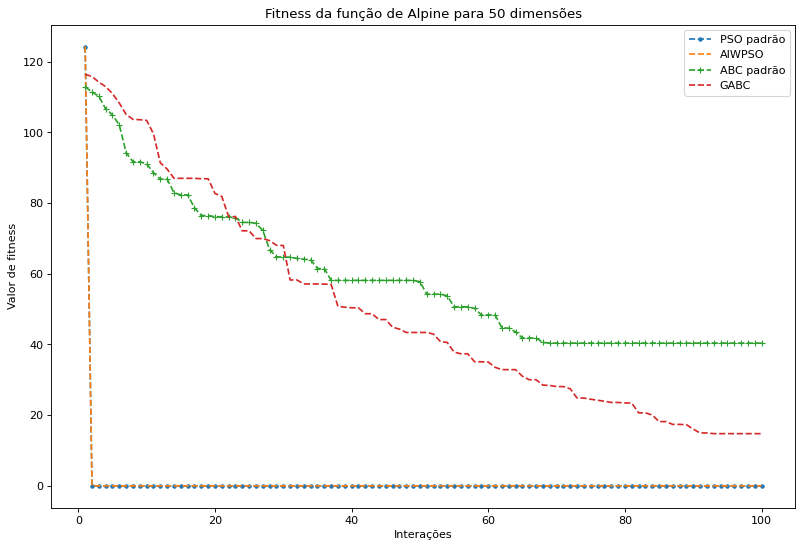

In [185]:
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 10, "alpine", 50)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 20, "alpine", 100)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 50, "alpine", 100)

## Função Schwefel com os resultados para 10, 20, 50 dimensões

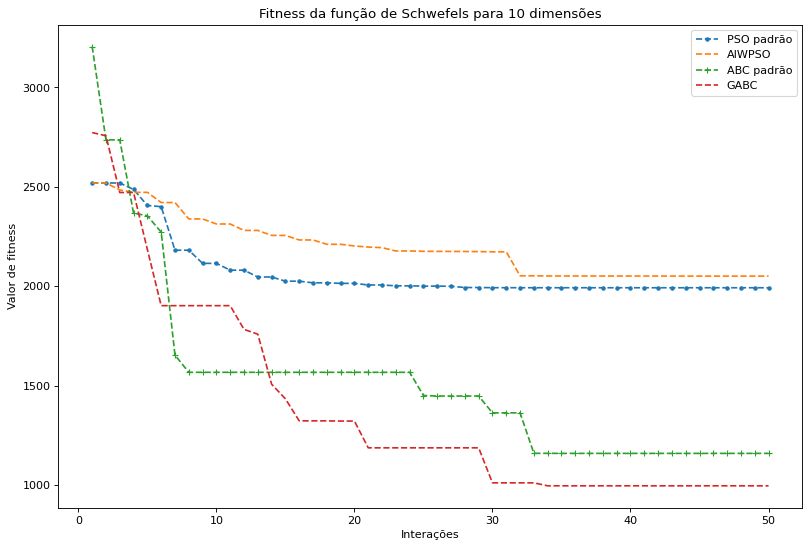

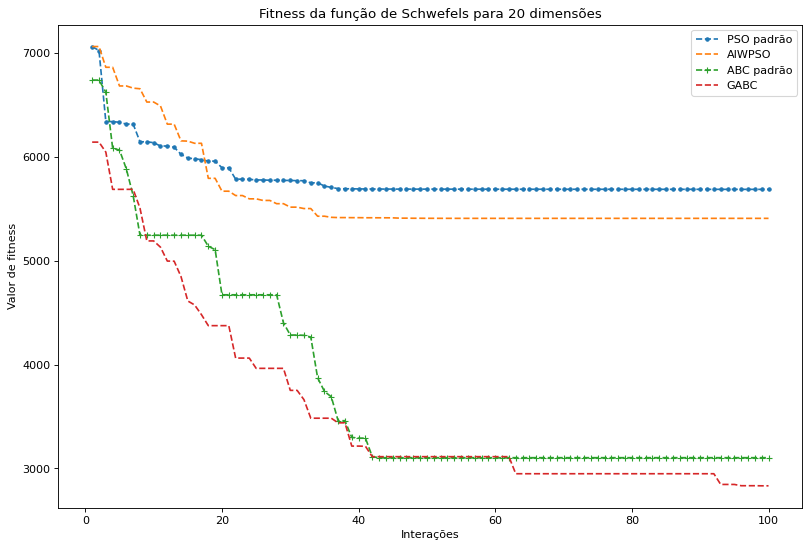

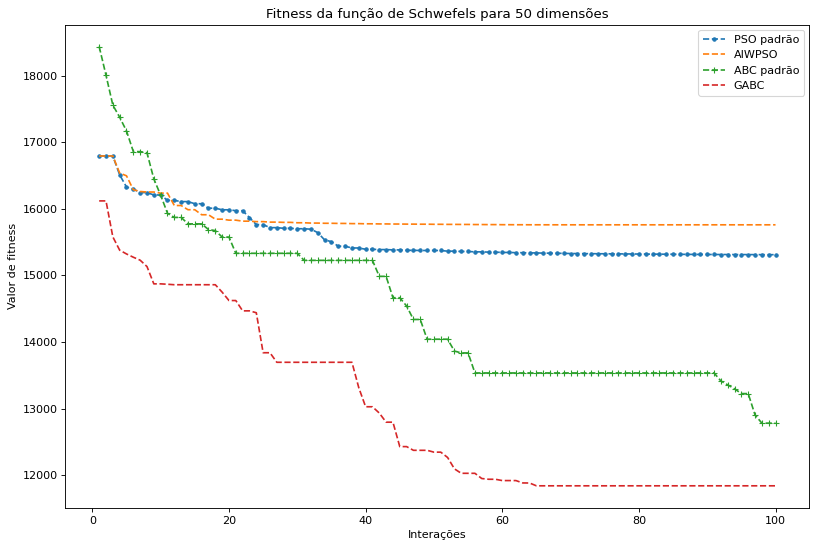

In [186]:
# schwefels
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 10, "schwefels", 50)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 20, "schwefels", 100)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 50, "schwefels", 100)

## Função Happy Cat com os resultados para 10, 20, 50 dimensões

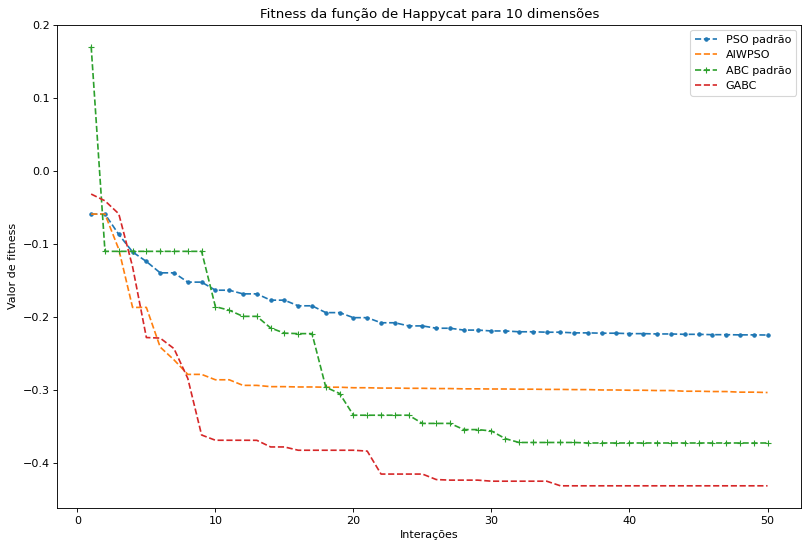

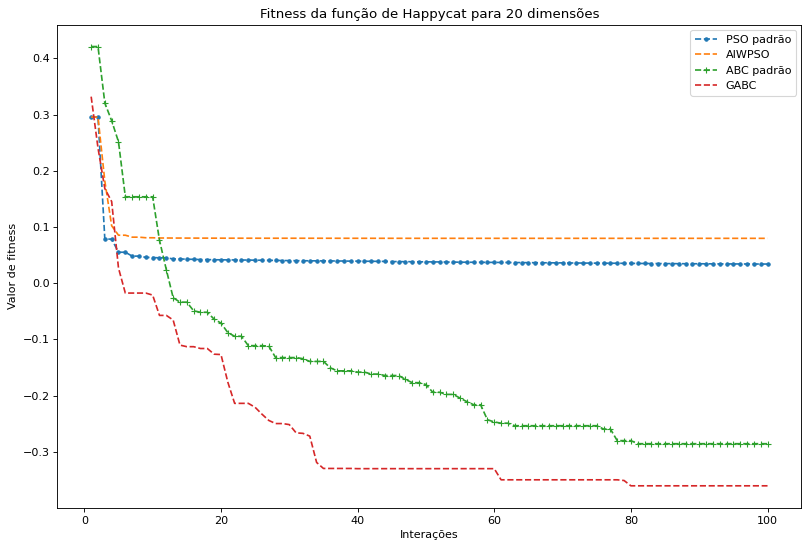

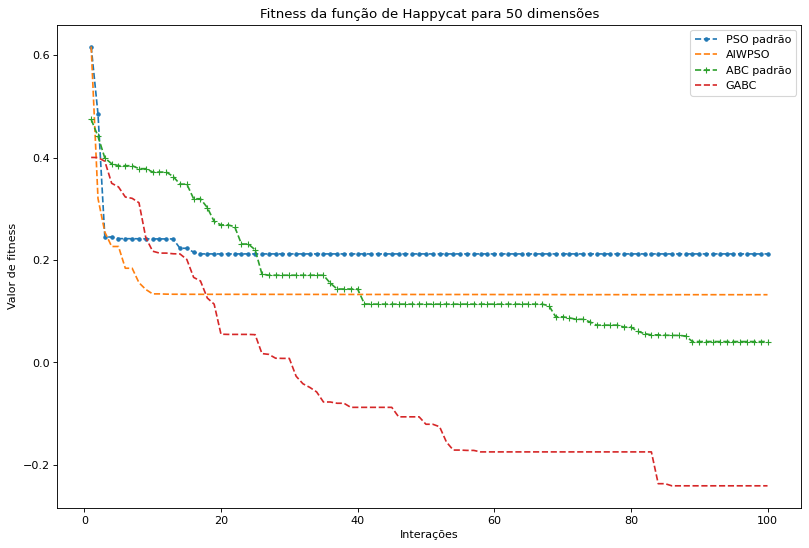

In [187]:
# happycat
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 10, "happycat", 50)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 20, "happycat", 100)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 50, "happycat", 100)

## Função Brown com os resultados para 10, 20, 50 dimensões

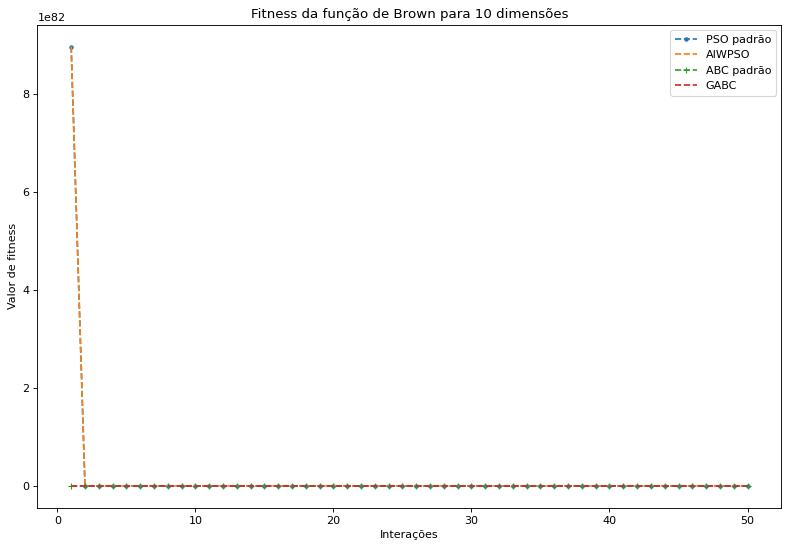

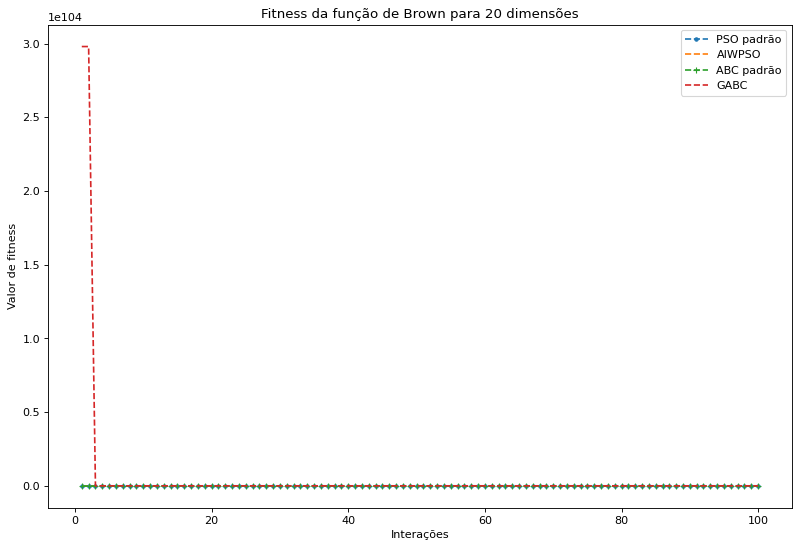

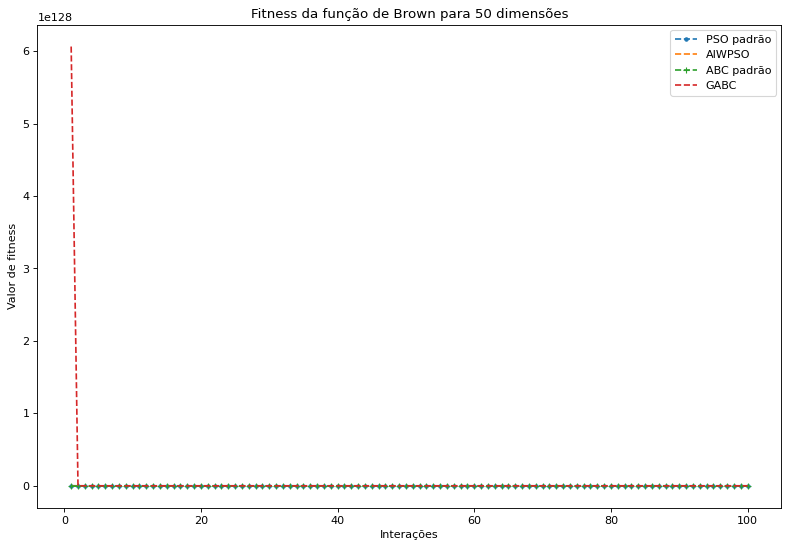

In [188]:
# brown
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 10, "brown", 50)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 20, "brown", 100)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 50, "brown", 100)

## Função Exponencial com os resultados para 10, 20, 50 dimensões

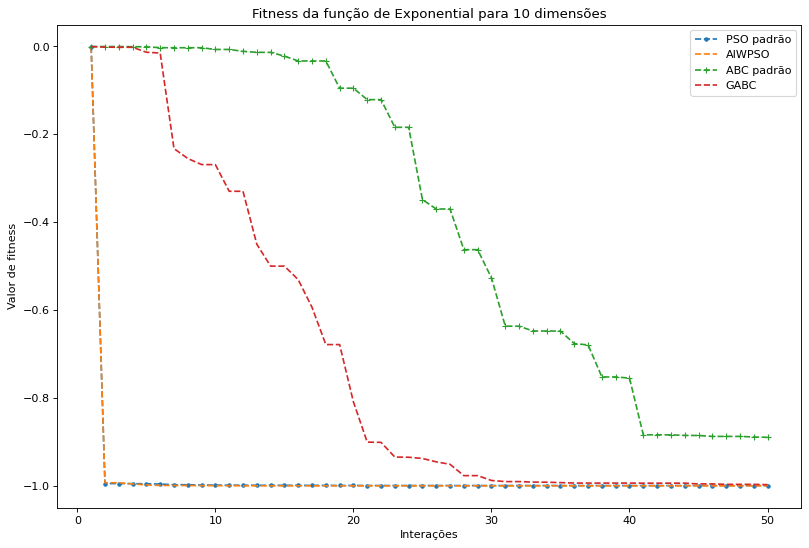

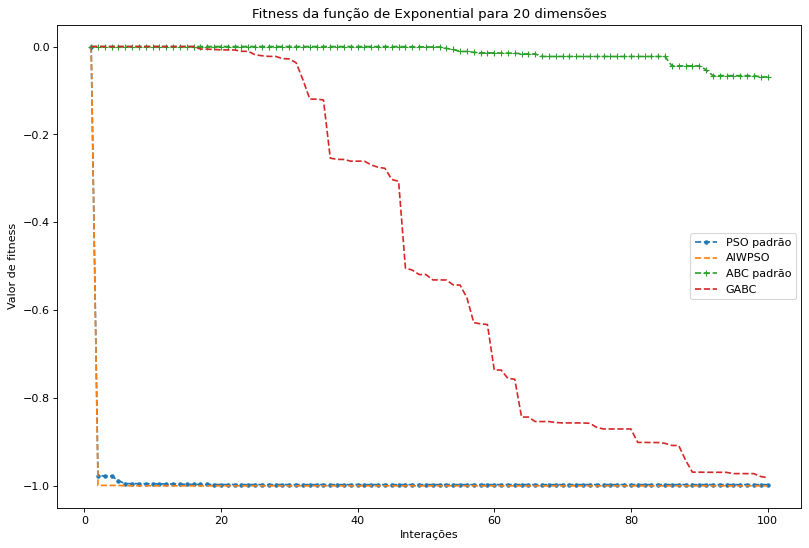

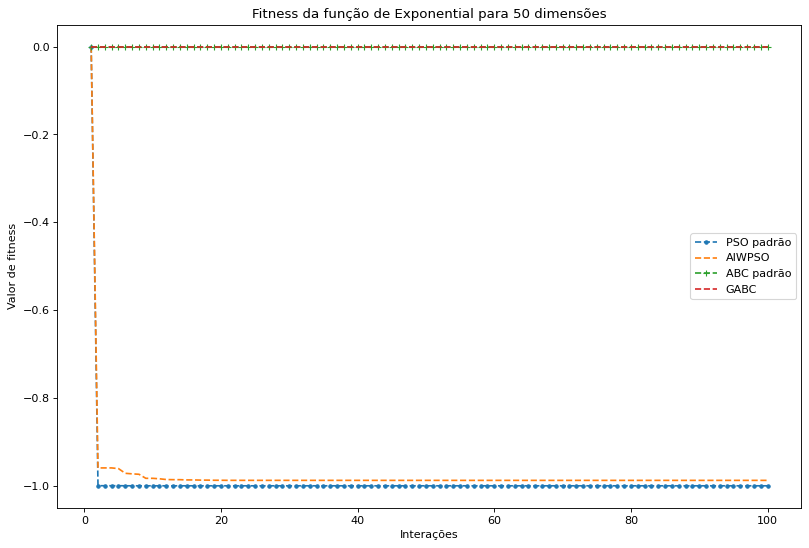

In [189]:
# exponential
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 10, "exponential", 50)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 20, "exponential", 100)
run_plot(pso_dim_dic, aiwpso_dim_dic, abc_dim_dic, gabc_dim_dic, 50, "exponential", 100)

# Outras referências
* [Lec 10 : Particle Swarm Optimization](https://www.youtube.com/watch?v=UKx76ThMXDM)
* [Lec 11 : Implementation of Particle Swarm Optimization using MATLAB](https://www.youtube.com/watch?v=2VJl37RWvkw)
* [Lec 18 : Working of Artificial Bee Colony Algorithm](https://youtu.be/MAhlPwK4_fI)
* [Lec 19 : Implementation of Artificial Bee Colony using MATLAB](https://www.youtube.com/watch?v=2Huy72h7Y20)
* [2003 The particle swarm optimization algorithm: convergence analysis and parameter selection](https://www.sciencedirect.com/science/article/abs/pii/S0020019002004477)
* [2011 A novel particle swarm optimization algorithm with adaptive inertia weight](https://www.sciencedirect.com/science/article/abs/pii/S156849461100055X)
* [2012 A modified Artificial Bee Colony algorithm for real-parameter optimization](https://www.sciencedirect.com/science/article/pii/S0020025510003336)
* [2013 An Overview of Particle Swarm Optimization Variants](https://www.sciencedirect.com/science/article/pii/S1877705813001823)
* [2014 Hierarchical Artificial Bee Colony Algorithm for RFID Network Planning Optimization](https://www.hindawi.com/journals/tswj/2014/941532/)
* [2014 Hybrid Artificial Bee Colony Algorithm and Particle Swarm Search for Global Optimization](https://www.hindawi.com/journals/mpe/2014/832949/)
* [2015 PS–ABC: A hybrid algorithm based on particle swarm and artificial bee colony for high-dimensional optimization problems](https://www.sciencedirect.com/science/article/abs/pii/S0957417415005035)
* [2019 An adaptive encoding learning for artificial bee colony algorithms](https://www.sciencedirect.com/science/article/abs/pii/S1877750318310123#:~:text=An%20adaptive%20encoding%20learning%20for%20artificial%20bee%20colony%20algorithms%20is,solve%20global%20numerical%20optimization%20problems.&text=An%20adaptive%20selection%20mechanism%20based,the%20exploration%20and%20exploitation%20abilities.)
* [2020 Population size in Particle Swarm Optimization](https://www.sciencedirect.com/science/article/pii/S2210650220303710)